In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')

In [2]:
df.head(20)

age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130         0    yes  southeast  39611.75770
15   19    male  24.600         1     no  southwest   1837.23700
16   52  female  30.780         1     no  northeast  10797.33620
17   23    male  23.845         0     no  northeast   2395.17155
18   56    male  40.300         0     no  southwest  10602.38500
19   30    male  35.300         0    yes  southwest  36837.46700

In [3]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [4]:
df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [22]:
print(df.groupby('smoker')['charges'].mean())
print('\n',df.groupby('smoker')['charges'].count()/df.shape[0])

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

 smoker
no     0.795217
yes    0.204783
Name: charges, dtype: float64


In [23]:
print(df.groupby('sex')['charges'].mean())
print('\n',df.groupby('sex')['charges'].count()/df.shape[0])

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

 sex
female    0.494768
male      0.505232
Name: charges, dtype: float64


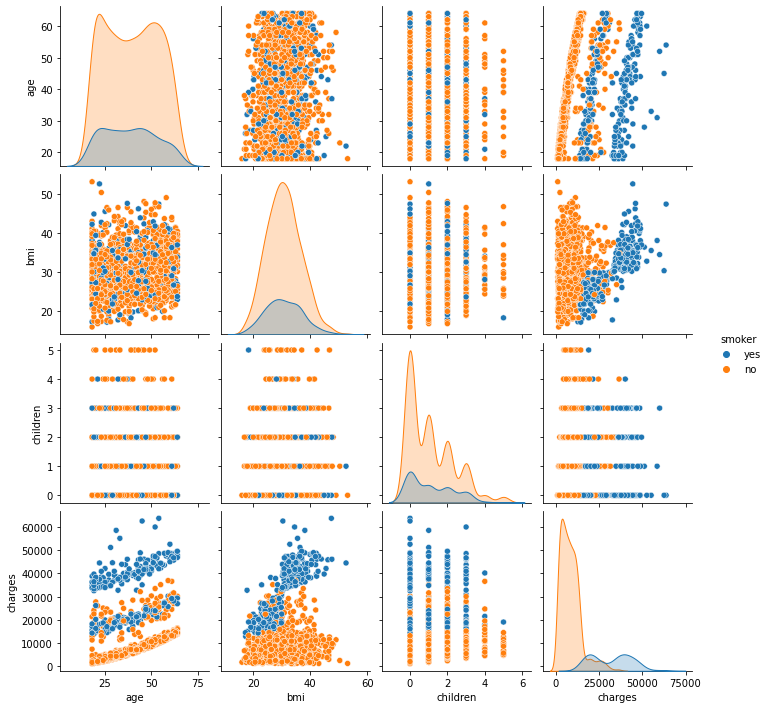

In [5]:
import seaborn as sns
sns.pairplot(df, hue = 'smoker')

In [9]:
import statsmodels.formula.api as sm
result = sm.ols(formula= "charges ~ age + smoker*bmi", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1702.
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:23:35   Log-Likelihood:                -13267.
No. Observations:                1338   AIC:                         2.654e+04
Df Residuals:                    1333   BIC:                         2.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2290.0080    831.999     -2.752      0.006   -3922.179    -657.837
smoker[T.yes]     -2.009e+04   1666.827    -12.055      0.000   -2.34e+04   -1.68e+04
age                 266.7582      9.617     27.739      0.000     247.893     285.624
bmi                   7.1093     25.058      0.284      0.777     -42.049      56.267
smoker[T.yes]:bmi  1430.9204     53.217     26.888      0.000    1326.522    1535.319
==============================================================================
Omnibus:                      708.403   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4237.479
Skew:                           2.485   Prob(JB):                         0.00
Kurtosis:                      10.162   Cond. No.                         660.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""